Standart olan kütüphaneleri import etme, veri setlerini çağırma ve veri setinde gerekli düzenlemeleri yapma işlemlerini gerçekleştirelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [4]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

In [5]:
#barPlot1 dökümanı
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

In [6]:
#barPlot2 dökümanı
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

In [7]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])

In [8]:
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)

In [9]:
data.sort_values('area_poverty_ratio',inplace=True)

Fakirlik oranı ile liseden mezun olma oranlarını Pair plot ile görselleştirelim.

In [10]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


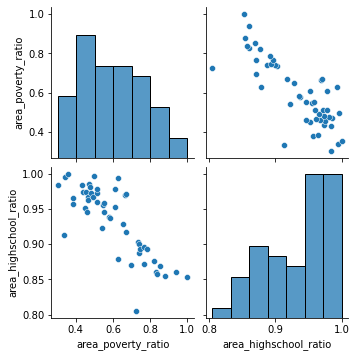

In [11]:
sns.pairplot(data)
plt.show()

Çıktıda gördüğünüz üzere, veri setindeki numeric değerler plot edilmiştir. noktalı görsel scatter plot, bar'lara sahip görsel histogram'dır.

Sol alttaki görsele bakalım. Liseden mezun olma oranı azaldıkça fakirlik oranı artıyor. 

Sağ alttaki görsele bakalım. Yaklaşık olarak 0.95 oranında en çok değerin olduğunu görebiliyoruz.

Sol üstteki görsele bakalım. Data içerisinde en çok bulunan değerin 0.40 olduğunu görebiliyoruz.

<font color="Red"><br>
Histogram, data içerisindeki değerlerin sıklıklarını gösterir.